$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.

d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

dict_keys(['__header__', '__version__', '__globals__', 'X'])
2.0


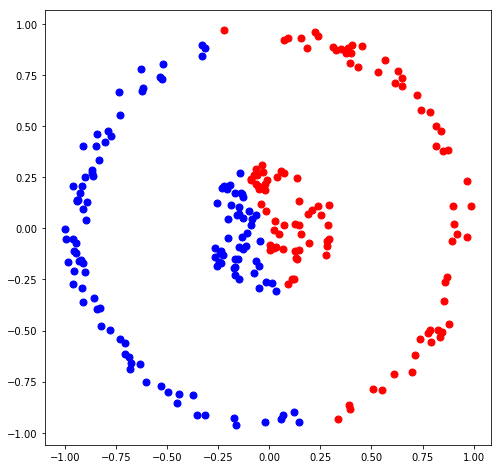

In [37]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('hw5_p1b.mat')
print (mat.keys())
X = mat['X']
k = 2
num_points = int(X.size/2)
cluster_assignment = np.zeros(num_points, np.int8)
# Guess the mus
changed_points = 1
num_dims = 2

mus_choice = np.random.choice(num_points, k)

mus = []
for i in range(k):
    this_mu = X[mus_choice[i]]
    x_val = this_mu[0]
    y_val = this_mu[1]
    mus.append(this_mu)

def get_distance(point, mu):
    # In the lecture they don't have the sqrt?
    return np.sqrt(np.dot(point-mu, point-mu))


print(get_distance(np.asarray([0, 1]), np.asarray([0,3])))

while(changed_points != 0):
    changed_points = 0
    
    # ASSIGN POINTS TO CLUSTERS
    for point_counter, point in enumerate(X):
        distance_vector = np.zeros(k)
        for counter, mu in enumerate(mus):
            distance_vector[counter] = get_distance(point, mu)
        new_assignment = np.argmin(distance_vector)
        old_assignment = cluster_assignment[point_counter]
        if new_assignment != old_assignment:
            changed_points = changed_points + 1
            cluster_assignment[point_counter] = new_assignment
    
    # UPDATE MUS
    for counter, mu in enumerate(mus):
        my_points = X[cluster_assignment==counter]
        mus[counter] = np.sum(my_points, axis=0)/num_points
        
        
red_X = X[cluster_assignment==0]
blue_X = X[cluster_assignment==1]

plt.figure(figsize = (8, 8))
plt.plot(red_X[:,0], red_X[:,1], 'ro', ms = 7)
plt.plot(blue_X[:,0], blue_X[:,1], 'bo', ms = 7)


In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
k = 2
num_points = int(X.size/2)
cluster_assignment = np.zeros(num_points, np.int8)
# Guess the mus
changed_points = 1
num_dims = 2
sigma = 0.2
cluster_assignments = np.random.randint(0, k, num_points)

kernel_factor = 1/(sigma*sigma*2)


def get_distance(point, mu):
    # In the lecture they don't have the sqrt?
    return np.sqrt(np.dot(point-mu, point-mu))

def gaussian_RBF(point1, point2):
    return -kernel_factor*np.dot(point1-point2, point1-point2)

def kernel(this_point, class_counts):
    distance_vector = np.zeros(k)
    for counter, curr_class_count in enumerate(class_counts):
        first_term = gaussian_RBF(this_point, this_point)
        
        pair_term = 0
        for counter_, sign in enumerate(cluster_assignments):
            if sign != 0:
                pair_term = pair_term + gaussian_RBF(this_point, X[counter_])
        
        second_term = -(2/curr_class_count)*pair_term
        
        FMT = 0
        for outer_counter, outer_class in enumerate(cluster_assignments):
            for inner_counter, inner_class in enumerate(cluster_assignments):
                if outer_class != 0 and inner_class != 0:
                    FMT = FMT + gaussian_RBF(X[inner_counter], X[outer_counter])
        third_term = 1/(curr_class_count*curr_class_count)*FMT
        distance_vector[counter] = first_term + second_term + third_term
        
    return np.argmin(distance_vector)

# print(get_distance(np.asarray([0, 1]), np.asarray([0,3])))

steps = 0
class_counts = np.empty(2)
while(changed_points != 0 and steps < 10):
    changed_points = 0
    
    # ASSIGN POINTS TO CLUSTERS
    for point_counter, point in enumerate(X):
        distance_vector = np.zeros(k)
        num_ones = np.sum(class_counts)
        num_zeros = num_points - num_ones
        print("num_ones")
        print(num_ones)
        print("num_zeros")
        print(num_zeros)
        
        class_counts[0] = num_zeros
        class_counts[1] = num_ones
        new_assignment = kernel(point, class_counts)
        old_assignment = cluster_assignment[point_counter]
        if new_assignment != old_assignment:
            changed_points = changed_points + 1
            cluster_assignment[point_counter] = new_assignment
    
    # UPDATE MUS
    for counter, mu in enumerate(mus):
        my_points = X[cluster_assignment==counter]
        mus[counter] = np.sum(my_points, axis=0)/num_points
    if steps == 1:
        cluster_assignment_legacy = np.copy(cluster_assignment)
    steps = steps + 1
        
red_X = X[cluster_assignment==0]
blue_X = X[cluster_assignment==1]

plt.figure(figsize = (8, 8))
plt.plot(red_X[:,0], red_X[:,1], 'ro', ms = 7)
plt.plot(blue_X[:,0], blue_X[:,1], 'bo', ms = 7)

changed = (cluster_assignment == cluster_assignment_legacy).astype(int)

star_X = X[changed==0]

plt.plot(star_X[:,0], star_X[:,1], 'w*', ms = 7)
